[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  99 of 99 completed


   Ticker      Beta  Future Percent Change (%)
0    AAPL  1.273341                  -7.509793
1    MSFT  1.241413                  13.651147
2   GOOGL  1.345011                   9.235003
3    TSLA  1.886032                 -29.236779
4    AMZN  1.512851                  20.309487
..    ...       ...                        ...
94    APH  1.103790                  19.366566
95    ATO  0.468206                   2.380866
96    AVY  1.005141                  12.230098
97    BAX  0.563464                  10.785935
98    BIO  0.976419                   5.451387

[99 rows x 3 columns]


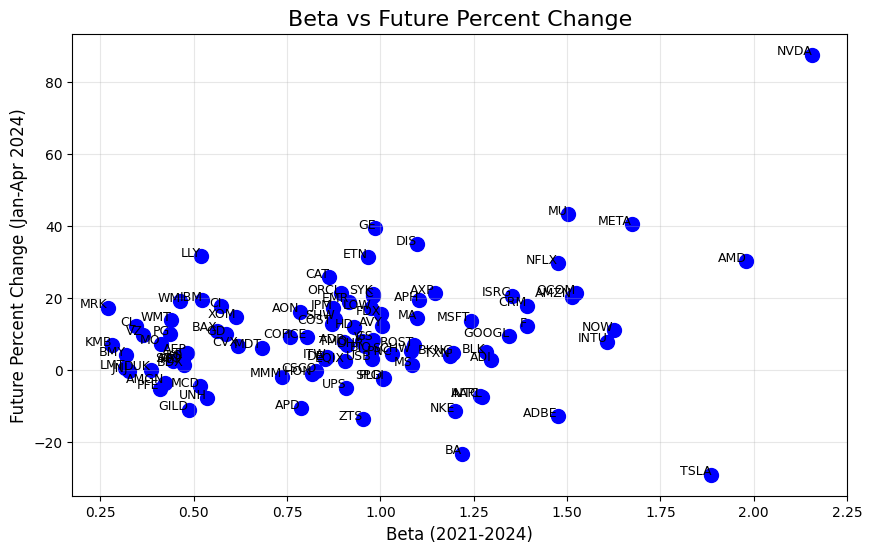

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def calculate_beta_and_future_change(tickers, market_ticker, beta_start_date, beta_end_date, future_start_date, future_end_date):
    # Fetch 3 years of data for beta calculation
    beta_data = yf.download(tickers + [market_ticker], start=beta_start_date, end=beta_end_date)['Adj Close']
    beta_returns = beta_data.pct_change().dropna()
    
    market_returns = beta_returns[market_ticker]
    
    beta_values = {}
    for ticker in tickers:
        stock_returns = beta_returns[ticker]
        cov_matrix = stock_returns.cov(market_returns)
        beta = cov_matrix / market_returns.var()
        beta_values[ticker] = beta
    
    # Fetch 3 months of data for percent change
    future_data = yf.download(tickers, start=future_start_date, end=future_end_date)['Adj Close']
    
    # Calculate percent change over the 3 months
    future_percent_changes = {}
    for ticker in tickers:
        if not future_data[ticker].empty:
            future_percent_changes[ticker] = (future_data[ticker].iloc[-1] / future_data[ticker].iloc[0] - 1) * 100
        else:
            future_percent_changes[ticker] = None  # Handle missing data gracefully

    # Combine beta and future percent change into a DataFrame
    result_df = pd.DataFrame({
        "Ticker": list(beta_values.keys()),
        "Beta": list(beta_values.values()),
        "Future Percent Change (%)": [future_percent_changes[ticker] for ticker in tickers]
    })
    return result_df

# Parameters
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN', 'NVDA', 'META', 'JNJ', 'JPM', 'V', 'PG', 'UNH', 'HD', 'MA', 
           'DIS', 'NFLX', 'ADBE', 'KO', 'PEP', 'XOM', 'VZ', 'INTC', 'MRK', 'T', 'CSCO', 'PFE', 'CRM', 'BMY', 'QCOM', 
           'WMT', 'NKE', 'ORCL', 'LLY', 'COST', 'MCD', 'AMGN', 'DHR', 'UPS', 'TXN', 'MDT', 'GS', 'HON', 'IBM', 
           'MS', 'BLK', 'LOW', 'BA', 'CVX', 'SPGI', 'CAT', 'GE', 'NOW', 'MMM', 'ISRG', 'INTU', 'SYK', 'PLD', 
           'SCHW', 'BKNG', 'ZTS', 'TMO', 'CI', 'LMT', 'C', 'AXP', 'MU', 'AMD', 'DE', 'MO', 'FDX', 'GILD', 'DUK', 
           'AEP', 'CL', 'KMB', 'SO', 'ADP', 'PNC', 'USB', 'COP', 'BDX', 'ADI', 'WM', 'ETN', 'ICE', 'F', 'EMR', 
           'ROST', 'AON', 'ITW', 'GD', 'SHW', 'EQIX', 'APD', 'APH', 'ATO', 'AVY', 'BAX', 'BIO']
market_ticker = "^GSPC"  # S&P 500
beta_start_date = "2021-01-01"  # Start of 3-year period for beta calculation
beta_end_date = "2024-01-01"  # End of 3-year period for beta calculation
future_start_date = "2024-01-01"  # Start of 3-month period for percent change
future_end_date = "2024-04-01"  # End of 3-month period for percent change

# Calculate Beta and Future Percent Change
results_df = calculate_beta_and_future_change(tickers, market_ticker, beta_start_date, beta_end_date, future_start_date, future_end_date)

# Display DataFrame
print(results_df)

# Create Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df["Beta"], results_df["Future Percent Change (%)"], color="blue", s=100)

# Add labels for each ticker
for i in range(len(results_df)):
    plt.text(results_df["Beta"].iloc[i], results_df["Future Percent Change (%)"].iloc[i], results_df["Ticker"].iloc[i],
             fontsize=9, ha='right')

# Customize plot
plt.title("Beta vs Future Percent Change", fontsize=16)
plt.xlabel("Beta (2021-2024)", fontsize=12)
plt.ylabel("Future Percent Change (Jan-Apr 2024)", fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()


In [5]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def calculate_volatility_and_future_change(tickers, start_date, end_date, future_start_date, future_end_date):
    # Fetch data for volatility calculation
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    daily_returns = data.pct_change().dropna()
    
    # Calculate historical volatility (standard deviation of daily returns)
    volatility = daily_returns.std()

    # Fetch data for percent change calculation
    future_data = yf.download(tickers, start=future_start_date, end=future_end_date)['Adj Close']

    # Calculate percent change over the future period
    future_percent_changes = {}
    for ticker in tickers:
        if not future_data[ticker].empty:
            future_percent_changes[ticker] = (future_data[ticker].iloc[-1] / future_data[ticker].iloc[0] - 1) * 100
        else:
            future_percent_changes[ticker] = None  # Handle missing data gracefully

    # Combine volatility and percent change into a DataFrame
    result_df = pd.DataFrame({
        "Ticker": tickers,
        "Volatility": [volatility[ticker] for ticker in tickers],
        "Future Percent Change (%)": [future_percent_changes[ticker] for ticker in tickers]
    })
    result_df.dropna(inplace=True)  # Remove rows with missing data
    return result_df

# Parameters
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN', 'NVDA', 'META', 'JNJ', 'JPM', 'V', 'PG', 'UNH', 'HD', 'MA', 
           'DIS', 'NFLX', 'ADBE', 'KO', 'PEP', 'XOM', 'VZ', 'INTC', 'MRK', 'T', 'CSCO', 'PFE', 'CRM', 'BMY', 'QCOM', 
           'WMT', 'NKE', 'ORCL', 'LLY', 'COST', 'MCD', 'AMGN', 'DHR', 'UPS', 'TXN', 'MDT', 'GS', 'HON', 'IBM', 
           'MS', 'BLK', 'LOW', 'BA', 'CVX', 'SPGI', 'CAT', 'GE', 'NOW', 'MMM', 'ISRG', 'INTU', 'SYK', 'PLD', 
           'SCHW', 'BKNG', 'ZTS', 'TMO', 'CI', 'LMT', 'C', 'AXP', 'MU', 'AMD', 'DE', 'MO', 'FDX', 'GILD', 'DUK', 
           'AEP', 'CL', 'KMB', 'SO', 'ADP', 'PNC', 'USB', 'COP', 'BDX', 'ADI', 'WM', 'ETN', 'ICE', 'F', 'EMR', 
           'ROST', 'AON', 'ITW', 'GD', 'SHW', 'EQIX', 'APD', 'APH', 'ATO', 'AVY', 'BAX', 'BIO']
start_date = "2021-01-01"
end_date = "2024-01-01"
future_start_date = "2024-01-01"
future_end_date = "2024-04-01"

# Calculate Volatility and Future Percent Change
results_df = calculate_volatility_and_future_change(tickers, start_date, end_date, future_start_date, future_end_date)

# Prepare data for Linear Regression
X = results_df[["Volatility"]]  # Independent variable (Volatility)
y = results_df["Future Percent Change (%)"]  # Dependent variable (Percent change)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Take user input for a stock ticker
user_ticker = input("Enter the stock ticker to predict its future percent change: ").upper()

# Fetch the data for the user's stock
try:
    user_data = yf.download(user_ticker, start=start_date, end=end_date)['Adj Close']
    user_daily_returns = user_data.pct_change().dropna()
    user_volatility = user_daily_returns.std()  # Calculate volatility for the input stock

    # Predict the percent change based on the calculated volatility
    predicted_percent_change = model.predict([[user_volatility]])[0]
    print(f"Predicted percent change for {user_ticker} with Volatility {user_volatility:.4f}: {predicted_percent_change:.2f}%")
except Exception as e:
    print(f"An error occurred while processing the ticker {user_ticker}: {e}")

# Display the DataFrame with Volatility and Percent Change
print("\nData used for training:")
print(results_df)


[*********************100%***********************]  99 of 99 completed
[*********************100%***********************]  99 of 99 completed


Mean Squared Error: 64.86
R-squared: -0.11


[*********************100%***********************]  1 of 1 completed

Predicted percent change for BOMXF with Volatility 0.0223: 12.86%

Data used for training:
   Ticker  Volatility  Future Percent Change (%)
0    AAPL    0.017511                  -7.509793
1    MSFT    0.017534                  13.651147
2   GOOGL    0.019994                   9.235003
3    TSLA    0.037099                 -29.236779
4    AMZN    0.023557                  20.309487
..    ...         ...                        ...
94    APH    0.014791                  19.366557
95    ATO    0.013049                   2.380859
96    AVY    0.017059                  12.230098
97    BAX    0.017450                  10.785924
98    BIO    0.021718                   5.451387

[99 rows x 3 columns]



/Users/asrith/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/Users/asrith/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


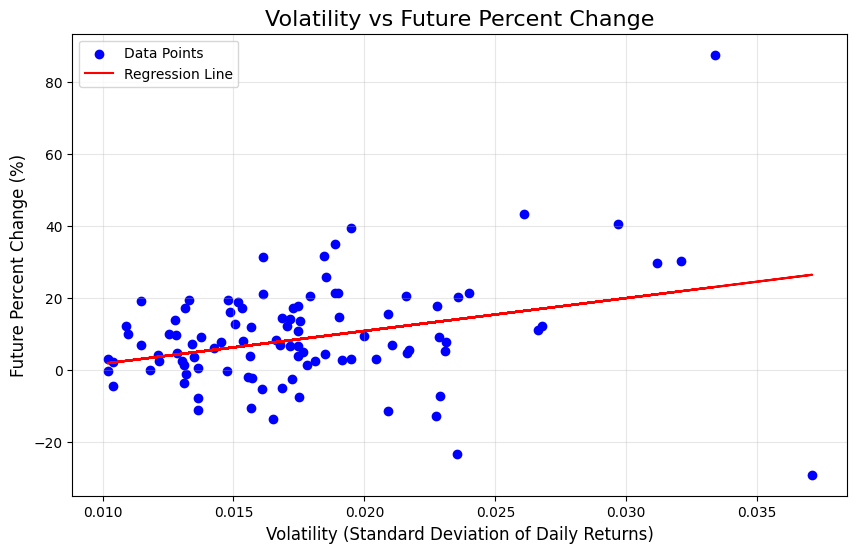

In [6]:
import matplotlib.pyplot as plt

# Scatter plot of volatilities vs. future percent changes
plt.figure(figsize=(10, 6))
plt.scatter(results_df["Volatility"], results_df["Future Percent Change (%)"], color="blue", label="Data Points")

# Plot the linear regression line
volatility_range = results_df["Volatility"].values.reshape(-1, 1)
predicted_changes = model.predict(volatility_range)
plt.plot(results_df["Volatility"], predicted_changes, color="red", label="Regression Line")

# Add labels, title, and legend
plt.title("Volatility vs Future Percent Change", fontsize=16)
plt.xlabel("Volatility (Standard Deviation of Daily Returns)", fontsize=12)
plt.ylabel("Future Percent Change (%)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()
